# Seaborn for Statistical Exploration
---
Source: https://scipy-lectures.org/packages/statistics/index.html#more-visualization-seaborn-for-statistical-exploration

## Dataset

Reference: Berndt, ER. The Practice of Econometrics. 1991. NY: Addison-Wesley.

Description:  The datafile contains 534 observations on 11 variables sampled from the Current Population Survey of 1985.  

**This data set demonstrates multiple regression, confounding, transformations, multicollinearity, categorical variables, ANOVA, pooled tests of significance, interactions and model building strategies.**

**Variable names in order from left to right**
- EDUCATION: Number of years of education.
- SOUTH: Indicator variable for Southern Region (1=Person lives in 		South, 0=Person lives elsewhere).
- SEX: Indicator variable for sex (1=Female, 0=Male).
- EXPERIENCE: Number of years of work experience.
- UNION: Indicator variable for union membership (1=Union member, 		0=Not union member).
- WAGE: Wage (dollars per hour).
- AGE: Age (years).
- RACE: Race (1=Other, 2=Hispanic, 3=White).
- OCCUPATION: Occupational category (1=Management, 		2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other).
- SECTOR: Sector (0=Other, 1=Manufacturing, 2=Construction).
- MARR: Marital Status (0=Unmarried,  1=Married)

In [127]:
# Downloading dataset
%run scripts/download_dataset.py 'http://lib.stat.cmu.edu/datasets/CPS_85_Wages' 'datasets/wages.txt'

## Test for an education/gender interaction in wages
Wages depend mostly on education. Here we investigate how this dependence is related to gender: not only does gender create an offset in wages, it also seems that wages increase more with education for males than females.

In [128]:
import pandas

# EDUCATION: Number of years of education
# SEX: 1=Female, 0=Male
# WAGE: Wage (dollars per hour)
df_educ_gender = pandas.read_csv('datasets/wages.txt', skiprows=27, skipfooter=6, sep=None, header=None,
    names=['education', 'gender', 'wage'], usecols=[0, 2, 5], engine='python') # engine=python because de 'c' engine doesn't support skipfooter

df_educ_gender.head()

,education,gender,wage
0,8,1,5.10
1,9,1,4.95
2,12,0,6.67
3,12,0,4.00
4,12,0,7.50


In [129]:
import numpy as np

# convert genders to string
df_educ_gender['gender'] = np.choose(df_educ_gender.gender, ['male', 'female'])

# Log-transform the wages, because they typically are increased with # multiplicative factors
df_educ_gender['wage'] = np.log10(df_educ_gender['wage'])

df_educ_gender.head()

,education,gender,wage
0,8,female,0.707570
1,9,female,0.694605
2,12,male,0.824126
3,12,male,0.602060
4,12,male,0.875061


### Plotting all genders

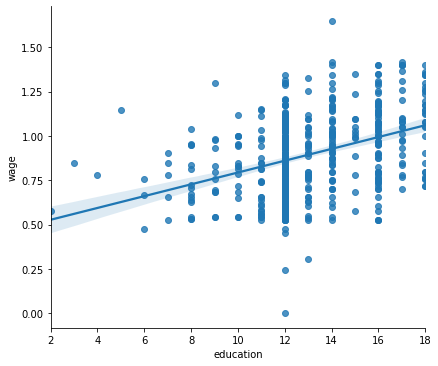

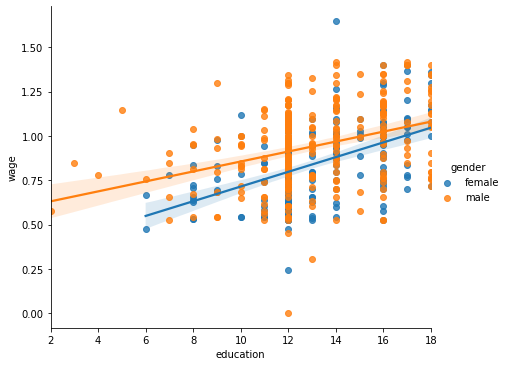

In [130]:
import seaborn

seaborn.lmplot(y='wage', x='education', data=df_educ_gender, aspect=1.2)
seaborn.lmplot(y='wage', x='education', hue='gender', data=df_educ_gender, aspect=1.2)

#### Robust Regression (less sensitive to outliers)
**Don't change something in this example, because we don't have many outliers were :)**

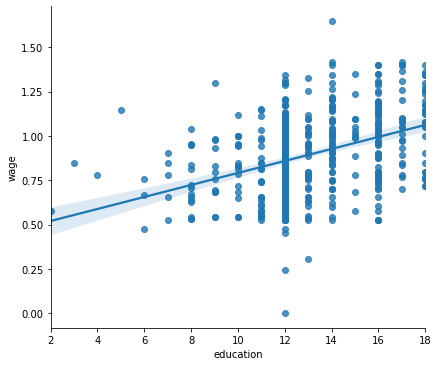

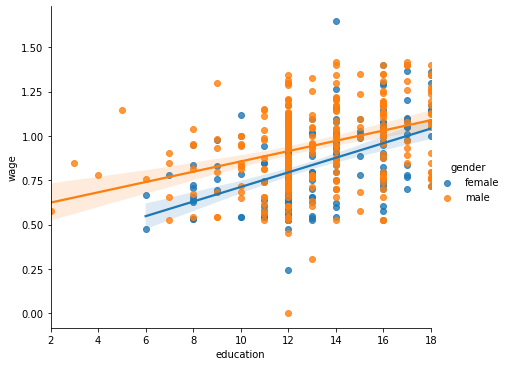

In [131]:
seaborn.lmplot(y='wage', x='education', data=df_educ_gender, aspect=1.2, robust=True)
seaborn.lmplot(y='wage', x='education', hue='gender', data=df_educ_gender, aspect=1.2, robust=True)

### Plotting 'males'

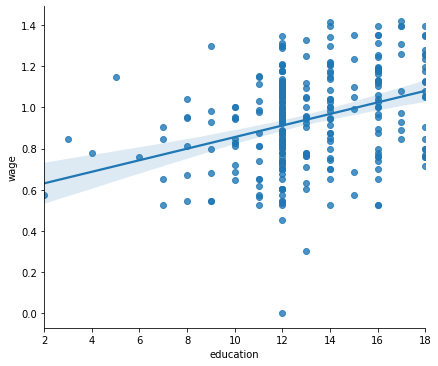

In [132]:
df_educ_male = df_educ_gender[(df_educ_gender.gender == 'male')]

seaborn.lmplot(y='wage', x='education', data=df_educ_male, aspect=1.2)

### Plotting 'famales'

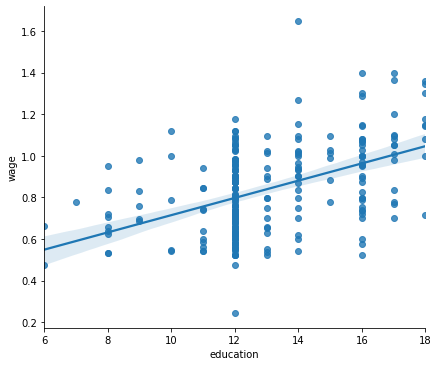

In [133]:
df_educ_female = df_educ_gender[(df_educ_gender.gender == 'female')]

seaborn.lmplot(y='wage', x='education', data=df_educ_female, aspect=1.2)

## Scatter Matrices

In [141]:
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

df_wages = pandas.read_csv('datasets/wages.txt', skiprows=27, skipfooter=6, sep=None, header=None, engine='python')
df_wages.columns = short_names

df_wages.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,5.10,35,2,6,1,1
1,9,0,1,42,0,4.95,57,3,6,1,1
2,12,0,0,1,0,6.67,19,3,6,1,0
3,12,0,0,4,0,4.00,22,3,6,0,0
4,12,0,0,17,0,7.50,35,3,6,0,1


In [143]:
df_wages['WAGE'] = np.log10(df_wages['WAGE'])

Text(0.5, 0.98, 'Effect of union: 1=Union member, 0=Not union member')

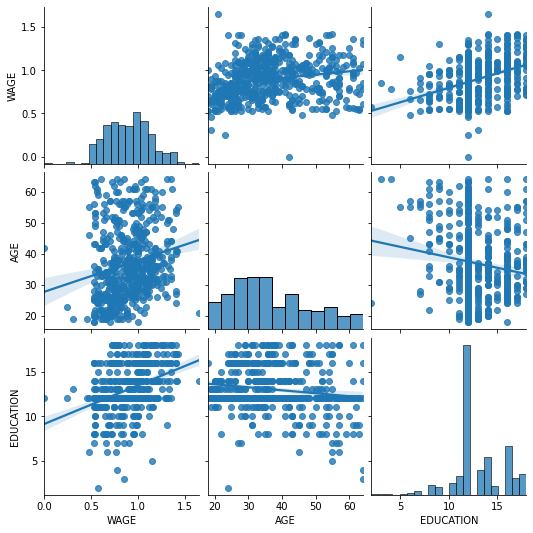

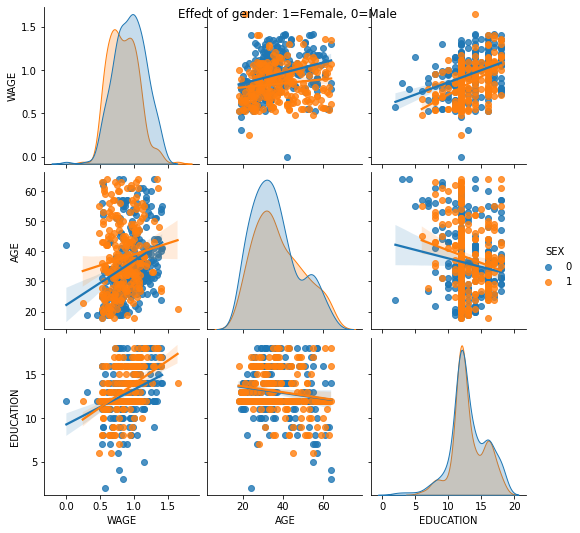

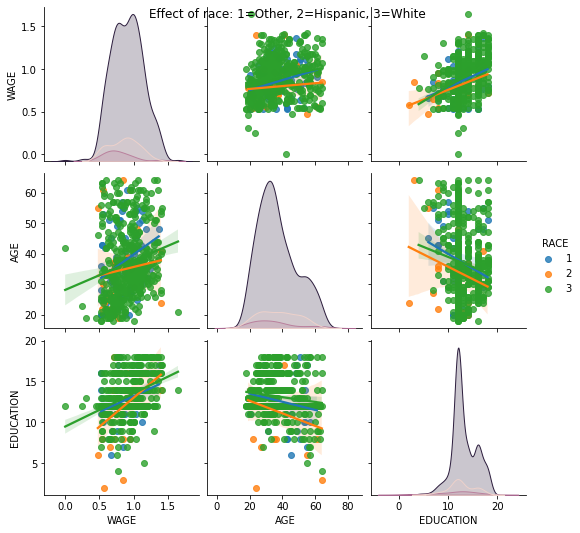

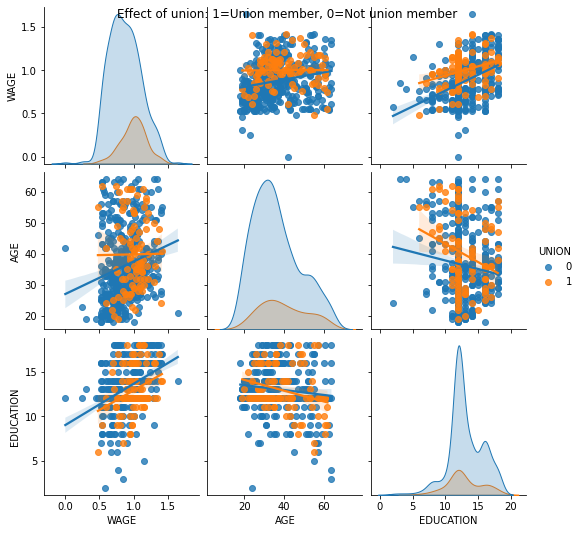

In [144]:
import matplotlib.pyplot as plt

seaborn.pairplot(df_wages, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')

seaborn.pairplot(df_wages, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

seaborn.pairplot(df_wages, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

seaborn.pairplot(df_wages, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')
